In [74]:
from os import getcwd

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [75]:
def get_data(filename):
    # You will need to write code that will read the file passed
    # into this function. The first line contains the column headers
    # so you should ignore it
    # Each successive line contians 785 comma separated values between 0 and 255
    # The first value is the label
    # The rest are the pixel values for that picture
    # The function will return 2 np.array types. One with all the labels
    # One with all the images
    #
    # Tips:
    # If you read a full line (as 'row') then row[0] has the label
    # and row[1:785] has the 784 pixel values
    # Take a look at np.array_split to turn the 784 pixels into 28x28
    # You are reading in strings, but need the values to be floats
    # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        images = []
        labels = []
        lines = training_file.readlines()
        for index, row in enumerate(lines):
            if index == 0:
                pass
            else:
                row = row.split(',')
                row = list(map(np.float, row))
                labels.append(row[0])
                images_as_np_array = np.asarray(row[1:785], dtype=np.float32)
                images_as_np_array = images_as_np_array.reshape((28, 28))
                images.append(images_as_np_array)

        # images.reshape((27455, 28, 28))
        images = np.asarray(images)
        labels = np.asarray(labels)
        return images, labels


path_sign_mnist_train = f"{getcwd()}/data/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/data/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [76]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1. / 255
)

train_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=20
)

validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=20
)
# Keep These
print(training_images.shape)
print(testing_images.shape)

# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [77]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

# Train the Model
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10
1373/1373 [==============================] - 12s 8ms/step - loss: 2.5463 - acc: 0.2175 - val_loss: 1.7095 - val_acc: 0.4327

[119.01956939697266, 0.7398215532302856]

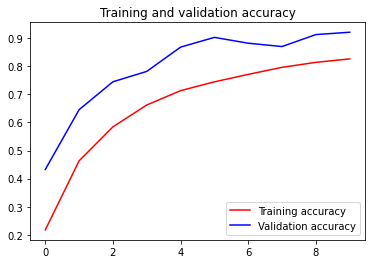

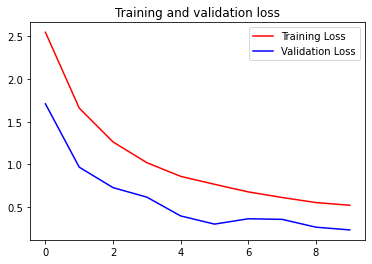

In [78]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
